In [1]:
import os
import opyplus as op
eplus_dir_path = op.get_eplus_base_dir_path((9, 2, 0))

In [2]:
# idf path

IDF = "RollerShade-Opyplus"
idf_path = os.path.join(
    eplus_dir_path,
    "Examplefiles", 
    IDF+".idf"
)
# epw path
epw_path = os.path.join(
    eplus_dir_path,
    "WeatherData",
    "IRN_Tehran-Mehrabad.407540_ITMY.epw"
)

# scheduele path
#  -external  حتما باشد چون با هر بار سیو فایل اسکجول در این محل سیو میشود 

schedule_path = "C:/Users/Morteza/OneDrive/Python/OpyPlus/RollerShade-Opyplus/opyplus-external/schedule.csv"

## input

In [3]:
#Run period
begin_month = 1
begin_day_of_month=1
end_month=1
end_day_of_month=1
Begin_year = 2019  #سال 2020 سال کبیسه است و تطابق یک روز عقب وجلوس
End_year = 2019

timestep = 1

In [4]:
ferqtimestep=str(int(60/timestep))+"min"
ferqtimestep

'60min'

In [5]:
#schedule set 
import numpy as np
import pandas as pd
schedule = pd.DataFrame(0, index=pd.date_range(str(Begin_year), freq=ferqtimestep, 
                                                 periods=8760*timestep), 
                        columns=["Window1","Windoes2","windows3","windows4",
                                 "windows5","windows6","windows7","window8","windows9",
                                 "windows10","OCR%","met DGI","met OCR","met E", "light","total_State","DGI0","met PMV", "HVAC"])
schedule.to_csv(schedule_path)

In [6]:
#تبدیل زمان شروع و خاتمه ران پریود برای انطباق با مدل


dateandtime = pd.DataFrame(
    {"year": [Begin_year,End_year], "month": [begin_month,end_month], "day": [begin_day_of_month, end_day_of_month], "hour": [0, 24]}
)

dateandtime=pd.to_datetime(dateandtime) 


for i in range(len(schedule)):
    if schedule.index[i]==dateandtime[0]:
        startday=i
        
    elif schedule.index[i]==dateandtime[1]:
        endday=i
        
        
LEN = len(schedule.iloc[startday:endday+1])

In [7]:
#load 
epm = op.Epm.load(idf_path)
#time step
epm.timestep[0].number_of_timesteps_per_hour=timestep 
#Run period 
epm.Runperiod[0].begin_month=begin_month
epm.Runperiod[0].begin_day_of_month=begin_day_of_month
epm.Runperiod[0].end_month=end_month
epm.Runperiod[0].end_day_of_month=end_day_of_month
epm.Runperiod[0].begin_year=Begin_year
epm.Runperiod[0].end_year=End_year
#sschedule set
for i in range(0,12):
    epm.schedule_file[i].minutes_per_item=60/timestep
    epm.schedule_file[i].file_name = schedule_path

# run simulation
s = op.simulate(epm, epw_path, IDF)

# save new idf
epm.save("m.idf")

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


In [8]:
print(f"status: {s.get_status()}\n")
print(f"Eplus .err file:\n{s.get_out_err().get_content()}")

status: finished

Eplus .err file:
Program Version,EnergyPlus, Version 9.2.0-921312fa1d, YMD=2021.12.05 17:59,
   ** Warning ** Timestep: Requested number (1) is less than the suggested minimum of 4.
   **   ~~~   ** Please see entry for Timestep in Input/Output Reference for discussion of considerations.
   ************* Beginning Zone Sizing Calculations
   ** Warning ** RunPeriod: object=RUN PERIOD 1, start weekday (MONDAY) does not match the start year (2019), corrected to TUESDAY.
   ** Warning ** ProcessScheduleInput: Schedule:Constant="AIR_VELO_SCH", Blank Schedule Type Limits Name input -- will not be validated.
   ** Warning ** ProcessScheduleInput: Schedule:Constant="ALWAYS OFF DISCRETE", Blank Schedule Type Limits Name input -- will not be validated.
   ** Warning ** ProcessScheduleInput: Schedule:Constant="ALWAYS ON CONTINUOUS", Blank Schedule Type Limits Name input -- will not be validated.
   ** Warning ** BuildingSurface:Detailed="SURFACE 2", Sun Exposure="SUNEXPOSED".
 

In [9]:
# retrieve hourly output (.eso file)
hourly_output = s.get_out_eso()

# ask for datetime index on year Begin_year
hourly_output.create_datetime_index(Begin_year)

# get Pandas dataframe
df = hourly_output.get_data()

In [10]:
setbackcooling = 26
setbackheating = 16
day_time_start = 8
day_time_end = 16
heating_months = [1,2,3,10,11,12]
for m in [1,3,5,7,8,10,12]:
    
    if sum([x == m for x in heating_months])==1:
        HVAC_mode = "heating"
    else:
        HVAC_mode = "cooling"
        
        
    for d in range(100*m+31,100*m+32):
        #Run period
        begin_month = m
        begin_day_of_month=d-100*m
        end_month=m
        end_day_of_month=d-100*m
        Begin_year = 2019  #سال 2020 سال کبیسه است و تطابق یک روز عقب وجلوس
        End_year = 2019

        timestep = 6
        ferqtimestep=str(int(60/timestep))+"min"
        ferqtimestep
        schedule = pd.DataFrame(0, index=pd.date_range(str(Begin_year), freq=ferqtimestep,
                                                       periods=8760*timestep), 
                        columns=["Window1","Windoes2","windows3","windows4",
                                 "windows5","windows6","windows7","window8","windows9",
                                 "windows10","OCR%","met DGI","met OCR","met E", "light","total_State","DGI0","met PMV", "HVAC"])
        
        schedule.to_csv(schedule_path)
        
        #تبدیل زمان شروع و خاتمه ران پریود برای انطباق با مدل


        dateandtime = pd.DataFrame(
            {"year": [Begin_year,End_year], "month": [begin_month,end_month], "day": [begin_day_of_month, end_day_of_month], "hour": [0, 23]}
        )

        dateandtime=pd.to_datetime(dateandtime) 


        for i in range(len(schedule)):
            if schedule.index[i]==dateandtime[0]:
                startday=i

            elif schedule.index[i]==dateandtime[1]:
                endday=i


        LEN = len(schedule.iloc[startday:endday+1])
        

        #load 
        epm = op.Epm.load(idf_path)
        #time step
        epm.timestep[0].number_of_timesteps_per_hour=timestep 
        #Run period 
        epm.Runperiod[0].begin_month=begin_month
        epm.Runperiod[0].begin_day_of_month=begin_day_of_month
        epm.Runperiod[0].end_month=end_month
        epm.Runperiod[0].end_day_of_month=end_day_of_month
        epm.Runperiod[0].begin_year=Begin_year
        epm.Runperiod[0].end_year=End_year
        #sschedule set
        for jj in range(0,12):
            epm.schedule_file[jj].minutes_per_item=60/timestep
            epm.schedule_file[jj].file_name = schedule_path 

        # run simulation
        s = op.simulate(epm, epw_path,IDF)
        # retrieve hourly output (.eso file)
        hourly_output = s.get_out_eso()
        # ask for datetime index on year Begin_year
        hourly_output.create_datetime_index(Begin_year)
        # get Pandas dataframe
        df = hourly_output.get_data()
        TSH =5
        
        for i in range (0,LEN):
            if df["hour"][i]>= day_time_start and df["hour"][i]<=day_time_end:
                time_type = "day"
            else:
                time_type = "night"
            print(schedule.iloc[startday+i])
            print(df["thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Glare Index"])
            if df['office work occ,Schedule Value'][i]==0:
                schedule.iloc[startday+i,14] = 0 #لامپ خاموش
                #summer
                if HVAC_mode == "cooling":
                    #weekend
                    if df['day_type'][i]=="Sunday" or df['day_type'][i]=="Saturday":
                            schedule.iloc[startday+i,0:10]=1 # پرده بسته
                            schedule.iloc[startday+i+1,0:10]=1 # پرده بسته
                            schedule.to_csv(schedule_path)
                            schedule.loc[schedule.index[startday+i],"OCR%"]=sum(schedule.iloc[startday+i,0:10])
                            
                    #weekday
                    else:
                        #در ساعت عدم حضور افراد در زمستان در روزهای کاری هفته پرده کاملا بسته 
                        schedule.iloc[startday+i,0:10]=1 # پرده بسته
                        schedule.to_csv(schedule_path)
                        schedule.loc[schedule.index[startday+i],"OCR%"]=sum(schedule.iloc[startday+i,0:10])
                        
                elif HVAC_mode == "heating":
                    #weekend
                    if df['day_type'][i]=="Sunday" or df['day_type'][i]=="Saturday":
                        if time_type == "day":
                            schedule.iloc[startday+i+1,0:10]=0 # پرده باز
                            schedule.to_csv(schedule_path)
                            schedule.loc[schedule.index[startday+i],"OCR%"]=sum(schedule.iloc[startday+i,0:10])
                        else:      
                            schedule.iloc[startday+i,0:10]=1 # پرده بسته
                            schedule.iloc[startday+i+1,0:10]=1 # پرده بسته
                            schedule.to_csv(schedule_path)
                            schedule.loc[schedule.index[startday+i],"OCR%"]=sum(schedule.iloc[startday+i,0:10])  
                    #weekday
                    else:
                        #در ساعت عدم حضور افراد در زمستان در روزهای کاری هفته پرده کاملا بسته 
                        schedule.iloc[startday+i,0:10]=1 # پرده بسته
                        schedule.to_csv(schedule_path)
                        schedule.loc[schedule.index[startday+i],"OCR%"]=sum(schedule.iloc[startday+i,0:10])
                            
                
                    
                    
                    if df["thermal zone 1,Zone Air Temperature"][i]<setbackheating: 
                        #schedule.iloc[startday+i,0:10]=1 # پرده بسته
                        schedule.loc[schedule.index[startday+i],"HVAC"]=1
                        schedule.to_csv(schedule_path)
                        schedule.loc[schedule.index[startday+i],"OCR%"]=sum(schedule.iloc[startday+i,0:10])
                    elif df["thermal zone 1,Zone Air Temperature"][i]>setbackcooling:
                        #schedule.iloc[startday+i+1,0:10]=0 # پرده باز
                        #schedule["HVAC"][startday+i+1]=1
                        schedule.loc[schedule.index[startday+i],"HVAC"]=1
                        schedule.to_csv(schedule_path)
                        schedule.loc[schedule.index[startday+i],"OCR%"]=sum(schedule.iloc[startday+i,0:10])
                    else:
                        #schedule.iloc[startday+i+1,0:10]=schedule.iloc[startday+i,0:10] # پرده باز
                        #schedule["HVAC"][startday+i+1]=1
                        schedule.loc[schedule.index[startday+i],"HVAC"]=0
                        schedule.to_csv(schedule_path)
                        schedule.loc[schedule.index[startday+i],"OCR%"]=sum(schedule.iloc[startday+i,0:10])

                    #load 
                    epm = op.Epm.load(idf_path)
                    #time step
                    epm.timestep[0].number_of_timesteps_per_hour=timestep 
                    #Run period 
                    epm.Runperiod[0].begin_month=begin_month
                    epm.Runperiod[0].begin_day_of_month=begin_day_of_month
                    epm.Runperiod[0].end_month=end_month
                    epm.Runperiod[0].end_day_of_month=end_day_of_month
                    epm.Runperiod[0].begin_year=Begin_year
                    epm.Runperiod[0].end_year=End_year
                    #sschedule set
                    for jj in range(0,12):
                        epm.schedule_file[jj].minutes_per_item=60/timestep
                        epm.schedule_file[jj].file_name = schedule_path 

                    # run simulation
                    s = op.simulate(epm, epw_path,IDF)
                    # retrieve hourly output (.eso file)
                    hourly_output = s.get_out_eso()
                    # ask for datetime index on year Begin_year
                    hourly_output.create_datetime_index(Begin_year)
                    # get Pandas dataframe
                    df = hourly_output.get_data()
                    #print("Run1")
                    #print(df[["thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Glare Index","thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Illuminance"]])


                    print(schedule.iloc[startday:endday+1])

            elif df['office work occ,Schedule Value'][i]>0:
                schedule.iloc[startday+i,0:TSH]=1 # پرده بسته
                schedule.to_csv(schedule_path)
                print(df["thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Glare Index"])
                print(i)
                dd=df[["shade file 01,Schedule Value","shade file 02,Schedule Value","shade file 03,Schedule Value",
                "shade file 04,Schedule Value","shade file 05,Schedule Value","shade file 06,Schedule Value",
                "shade file 07,Schedule Value","shade file 08,Schedule Value","shade file 09,Schedule Value",
                "shade file 10,Schedule Value"]]
                schedule.loc[schedule.index[startday+i],"OCR%"]=sum(schedule.iloc[startday+i,0:10])

                if df["thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Glare Index"][i]<=22:
                    schedule.iloc[startday+i,11]=True 
                    #schedule.loc[schedule.index[startday+i+1],"OCR%"]=sum(dd.iloc[i,0:])
                    if schedule["OCR%"][startday+i]== 0 and df["thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Illuminance"][i]<500:    # یعنی در این حالت تنها راه چاره روشن کردن لامپ است که در ستون 14 باید عدد یک بگذاریم برای اسکجوئل لامپ
                        schedule.iloc[startday+i,14] = 1   # لامپ روش شود 


                #schedule["OCR%"][startday+i]=sum(schedule.iloc[startday+i,0:10]) 
                #schedule["OCR%"][startday+i]=sum(dd.iloc[i,0:])
                    schedule.loc[schedule.index[startday+i+1],"OCR%"]=sum(dd.iloc[i,0:])

                if schedule["OCR%"][startday+i]<=TSH:
                    schedule.iloc[startday+i,12]=True  

                elif schedule["OCR%"][startday+i]>TSH:
                    schedule.iloc[startday+i,12]=False


                if df["thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Illuminance"][i]>500:
                    schedule.iloc[startday+i,13]=True 

                elif df["thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Illuminance"][i]<=500:
                    schedule.iloc[startday+i,13]=False

                #schedule["total_State"][startday+i]=schedule["met OCR"][startday+i]*schedule["met DGI"][startday+i]*max(schedule["light"][startday+i],schedule["met E"][startday+i])
                schedule.loc[schedule.index[startday+i],"total_State"]=schedule["met OCR"][startday+i]*schedule["met DGI"][startday+i]
                #  در حالت چک کردن ایلومیننس این اضافه گردد#*max(schedule["light"][startday+i],schedule["met E"][startday+i])
                #schedule["total_State"][startday+i]=schedule["met OCR"][startday+i]*schedule["met DGI"][startday+i]*schedule["met E"][startday+i]

                #print(i)



                if schedule["total_State"][startday+i]==False:
                    #print("total state is false")
                #if schedule["met OCR"][startday+i]==False:
                    #print("met OCR is False")

                    a = 10

                    #if schedule["OCR%"][startday+i]>TSH:  #بررسی میشود اگر در هر مرحله بیش از 50 درصد باز بود پرده آن را به حالت 50 درصد بر میگرداند.
                    #    schedule.iloc[startday+i,10]=TSH
                    #    schedule.iloc[startday+i,0:TSH]=1      
                     #   schedule.iloc[startday+i,TSH:10]=0  

                     #   a = 5

                    schedule.to_csv(schedule_path)
                    #load 
                    epm = op.Epm.load(idf_path)
                    #time step
                    epm.timestep[0].number_of_timesteps_per_hour=timestep 
                    #Run period 
                    epm.Runperiod[0].begin_month=begin_month
                    epm.Runperiod[0].begin_day_of_month=begin_day_of_month
                    epm.Runperiod[0].end_month=end_month
                    epm.Runperiod[0].end_day_of_month=end_day_of_month
                    epm.Runperiod[0].begin_year=Begin_year
                    epm.Runperiod[0].end_year=End_year
                    #sschedule set
                    for jj in range(0,12):
                        epm.schedule_file[jj].minutes_per_item=60/timestep
                        epm.schedule_file[jj].file_name = schedule_path 

                    # run simulation
                    s = op.simulate(epm, epw_path,IDF)
                    # retrieve hourly output (.eso file)
                    hourly_output = s.get_out_eso()
                    # ask for datetime index on year Begin_year
                    hourly_output.create_datetime_index(Begin_year)
                    # get Pandas dataframe
                    df = hourly_output.get_data()
                    #print("Run1")
                    #print(df[["thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Glare Index","thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Illuminance"]])
                    print(schedule.iloc[startday:endday+1])


                    for j in range(0,a):
                        print(df["thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Glare Index"])
                        print("for j=",j)           
                        print("DGI =", df["thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Glare Index"][i])

                        dd=df[["shade file 01,Schedule Value","shade file 02,Schedule Value","shade file 03,Schedule Value",
                "shade file 04,Schedule Value","shade file 05,Schedule Value","shade file 06,Schedule Value",
                "shade file 07,Schedule Value","shade file 08,Schedule Value","shade file 09,Schedule Value",
                "shade file 10,Schedule Value"]]


                        #schedule["OCR%"][startday+i]=sum(dd.iloc[i,0:])
                        schedule.loc[schedule.index[startday+i],"OCR%"]=sum(dd.iloc[i,0:])
                        if schedule["OCR%"][startday+i]<=TSH:    
                                schedule.iloc[startday+i,12]=True  # met OCR

                        elif schedule["OCR%"][startday+i]>TSH:    
                                schedule.iloc[startday+i,12]=False

                        if df["thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Glare Index"][i]<=22:
                                schedule.iloc[startday+i,11]=True        # met DGI

                        elif df["thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Glare Index"][i]>22:
                                schedule.iloc[startday+i,11]=False

                        if df["thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Illuminance"][i]>=500:
                                schedule.iloc[startday+i,13]=True
                        elif df["thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Illuminance"][i]<500:
                                schedule.iloc[startday+i,13]=False      

                        #schedule["total_State"][startday+i]=schedule["met OCR"][startday+i]*schedule["met DGI"][startday+i]*max(schedule["light"][startday+i],schedule["met E"][startday+i])
                        #schedule["total_State"][startday+i]=schedule["met DGI"][startday+i]*max(schedule["light"][startday+i],schedule["met E"][startday+i])
                        schedule.loc[schedule.index[startday+i],"total_State"]=schedule["met DGI"][startday+i]
                        # در حالت چک کردن ایلومیننس این اضافه گردد*max(schedule["light"][startday+i],schedule["met E"][startday+i])
                        schedule.to_csv(schedule_path)
                        #print(i)




                        if schedule["total_State"][startday+i]==False:
                            print("OCR=",schedule["OCR%"][startday+i])
                            print("DGI=",df["thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Glare Index"][i])
                            print("E=",df["thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Illuminance"][i])
                            print("total state is false")            
                            #schedule["OCR%"][startday+i]=sum(schedule.iloc[startday+i,0:10])
                            schedule.loc[schedule.index[startday+i],"OCR%"]=sum(schedule.iloc[startday+i,0:10])

                            schedule.to_csv(schedule_path)

                            if df["thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Glare Index"][i]<=22:
                                schedule.iloc[startday+i,11]=True
                                schedule.to_csv(schedule_path) 
                                if schedule["OCR%"][startday+i]== 0 and df["thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Illuminance"][i]<500:    # یعنی در این حالت تنها راه چاره روشن کردن لامپ است که در ستون 14 باید عدد یک بگذاریم برای اسکجوئل لامپ
                                    schedule.iloc[startday+i:startday+i+2,14] = 1   # لامپ روش شود 
                                    schedule.to_csv(schedule_path) 

                                elif schedule["OCR%"][startday+i]>TSH and schedule["OCR%"][startday+i]<=10: #and schedule["DGI0"][startday+i]==True:
                                    schedule.iloc[startday+i,10]=max(schedule.iloc[startday+i,10]-1,0) # یعنی یک استپ پرده این زمان و همه زمان های بعدی را کاهش دهد
                                    Ps =int(schedule.iloc[startday+i,10])
                                    #+1-1
                                    schedule.iloc[startday+i:startday+i+2,Ps:10]=0  # با این روش بصورت ساده پرده هایی که باید باز باشد را تعیین میکنم همان زمان و تمام زمان های بعدی 
                                    schedule.iloc[startday+i:startday+i+2,0:Ps]=1  
                                    if df["thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Illuminance"][i]<500:    # یعنی در این حالت تنها راه چاره روشن کردن لامپ است که در ستون 14 باید عدد یک بگذاریم برای اسکجوئل لامپ
                                        schedule.iloc[startday+i:startday+i+2,14] = 1   # لامپ روش شود 
                                    schedule.to_csv(schedule_path) 
                                    print("PS= ",Ps)
                                elif schedule["OCR%"][startday+i]<= TSH:
                                    
                                    schedule.iloc[startday+i,10]=min(schedule.iloc[startday+i,10],10) # نسبت به حالت قبل ثابت می ماند
                                    Ps =int(schedule["OCR%"][startday+i])
                                    #+1-1
                                    schedule.iloc[startday+i:startday+i+2,0:Ps]=1  
                                    schedule.to_csv(schedule_path) 
                                    if df["thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Illuminance"][i]<500:
                                        schedule.iloc[startday+i:startday+i+2,14] = 1   # لامپ روش شود
                                        schedule.to_csv(schedule_path)
                                    #print("PS= ",Ps)
                                #else:
                                  #  schedule.iloc[startday+i,14] = 1   # لامپ روش شود 



                            elif df["thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Glare Index"][i]>22:
                                print("G>22")
                                schedule.iloc[startday+i,11]=False
                                print("for i = "+str(i)+" and for j= "+str(j)+",total state is false")
                                #print(df["thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Glare Index"][i])
                                if  schedule["OCR%"][startday+i]>=0 and schedule["OCR%"][startday+i]<10 :    
                                    
                                    #schedule.iloc[startday+i,10]=min(schedule.iloc[startday+i,10]+1 , 10) # یعنی یک استپ پرده این زمان و همه زمان های بعدی را افزایش دهد
                                    schedule.iloc[startday+i,10]=schedule.iloc[startday+i,10]+1
                                    Ps=int(schedule.iloc[startday+i,10])
                                    #+1-1
                                    schedule.iloc[startday+i:startday+i+2,0:Ps]=1  # با این روش بصورت ساده پرده هایی که باید بسته باشد را تعیین میکنم همان زمان و تمام زمان های بعدی    
                                    schedule.iloc[startday+i:startday+i+2,Ps:10]=0  # با این روش بصورت ساده پرده هایی که باید باز باشد را تعیین میکنم همان زمان و تمام زمان های بعدی 
                                    schedule.to_csv(schedule_path) 
                                    print("PS= ",Ps)
                                if df["thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Illuminance"][i]<500:
                                        schedule.iloc[startday+i:startday+i+2,14] = 1   # لامپ روش شود
                                        schedule.to_csv(schedule_path)

                                #if  df["thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Illuminance"][i]<500 and schedule["OCR%"][startday+i]>=0 and schedule["OCR%"][startday+i]<10 :    # یعنی در این حالت تنها راه چاره روشن کردن لامپ است که در ستون 14 باید عدد یک بگذاریم برای اسکجوئل لامپ
                                #    print("E<500")
                                #   schedule.iloc[startday+i,14] = 1   #  چون بالاجبار پرده باید باز شود پس لامپ روش شود 
                                #    #schedule.iloc[startday+i,10]=min(schedule.iloc[startday+i,10]+1 , 10) # یعنی یک استپ پرده این زمان و همه زمان های بعدی را افزایش دهد
                                #    #schedule.iloc[startday+i,10]=schedule.iloc[startday+i,10]+1
                                #    #schedule["OCR%"][startday+i]=schedule["OCR%"][startday+i]+1
                                #    schedule.loc[schedule.index[startday+i],"OCR%"]=schedule["OCR%"][startday+i]+1
                                #    #Ps=int(schedule.iloc[startday+i,10])
                                #    Ps=int(schedule["OCR%"][startday+i])
                                #    schedule.iloc[startday+i:startday+i+2,0:Ps]=1  # با این روش بصورت ساده پرده هایی که باید بسته باشد را تعیین میکنم همان زمان و تمام زمان های بعدی    
                                #    schedule.iloc[startday+i:startday+i+2,Ps:10]=0  # با این روش بصورت ساده پرده هایی که باید باز باشد را تعیین میکنم همان زمان و تمام زمان های بعدی 
                                #    schedule.to_csv(schedule_path) 
                                #    print("PS= ",Ps)
                                    #print(schedule.iloc[startday:endday+1])
                                #elif  df["thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Illuminance"][i]>=500 and schedule["OCR%"][startday+i]>=0 and schedule["OCR%"][startday+i]<10 :    
                                #    print("E>500")
                                #    #schedule.iloc[startday+i,10]=min(schedule.iloc[startday+i,10]+1 , 10) # یعنی یک استپ پرده این زمان و همه زمان های بعدی را افزایش دهد
                                #    schedule.iloc[startday+i,10]=schedule.iloc[startday+i,10]+1
                                #    Ps=int(schedule.iloc[startday+i,10])
                                #    schedule.iloc[startday+i:startday+i+2,0:Ps]=1  # با این روش بصورت ساده پرده هایی که باید بسته باشد را تعیین میکنم همان زمان و تمام زمان های بعدی    
                                #    schedule.iloc[startday+i:startday+i+2,Ps:10]=0  # با این روش بصورت ساده پرده هایی که باید باز باشد را تعیین میکنم همان زمان و تمام زمان های بعدی 
                                #    schedule.to_csv(schedule_path) 
                                #    print("PS= ",Ps)



                            schedule.to_csv(schedule_path) 
                            df = pd.DataFrame() #ریست کردن دیتا فریم
                            #load 
                            epm = op.Epm.load(idf_path)
                            #time step
                            epm.timestep[0].number_of_timesteps_per_hour=timestep 
                            #Run period 
                            epm.Runperiod[0].begin_month=begin_month
                            epm.Runperiod[0].begin_day_of_month=begin_day_of_month
                            epm.Runperiod[0].end_month=end_month
                            epm.Runperiod[0].end_day_of_month=end_day_of_month
                            epm.Runperiod[0].begin_year=Begin_year
                            epm.Runperiod[0].end_year=End_year
                            #sschedule set
                            for jj in range(0,12):
                                epm.schedule_file[jj].minutes_per_item=60/timestep
                                epm.schedule_file[jj].file_name = schedule_path 

                            # run simulation
                            s = op.simulate(epm, epw_path, IDF)
                            # retrieve hourly output (.eso file)
                            hourly_output = s.get_out_eso()
                            # ask for datetime index on year Begin_year
                            hourly_output.create_datetime_index(Begin_year)
                            # get Pandas dataframe
                            df = hourly_output.get_data()
                            print(j)
                            #print("Run1")
                            #print(df[["thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Glare Index","thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Illuminance"]])
                            print(schedule.iloc[startday:endday+1,0:17])

                            if df["thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Glare Index"][i]<=22:
                                schedule.iloc[startday+i,11]=True
                            if df["thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Glare Index"][i+1]<=22:
                                schedule.iloc[startday+i+1,11]=True

                            if df["thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Illuminance"][i]>500:
                                schedule.iloc[startday+i,13]=True 
                            if df["thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Illuminance"][i+1]>500:
                                schedule.iloc[startday+i+1,13]=True    

                            #schedule["total_State"][startday+i]=schedule["met DGI"][startday+i]*max(schedule["light"][startday+i],schedule["met E"][startday+i])
                            #schedule["total_State"][startday+i+1]=schedule["met DGI"][startday+i+1]*max(schedule["light"][startday+i+1],schedule["met E"][startday+i+1])
                            schedule.loc[schedule.index[startday+i],"total_State"]=schedule["met DGI"][startday+i]*max(schedule["light"][startday+i],schedule["met E"][startday+i])
                            schedule.loc[schedule.index[startday+i],"total_State"]=schedule["met DGI"][startday+i+1]*max(schedule["light"][startday+i+1],schedule["met E"][startday+i+1])




                        else: 
                            break


                PMV = "thermal zone 1 189.1-2009 - office - openoffice - cz4-8 people,Zone Thermal Comfort Fanger Model PMV"
                if df[PMV][i]>0.5 or df[PMV][i]<-0.5 or df["thermal zone 1,Zone Air Temperature"][i]<setbackheating or df["thermal zone 1,Zone Air Temperature"][i]>setbackcooling:
                    #schedule["HVAC"][startday+i+1]=1 #تایم استپ بعدی را 
                    schedule.loc[schedule.index[startday+i+1],"HVAC"]=1
                    schedule.to_csv(schedule_path)
                print(schedule.iloc[startday+i])
                print("-------------*****--------------")
                #   if df["thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Illuminance"][i]<500:  #در نهایت بررسی شود اگر نیاز به روشن بودن لامپ بود انجام شود
                #        schedule.iloc[startday+i,14] = 1   # لامپ روش شود 
                #    print("This time is OK")

               # schedule.to_csv(schedule_path)
        schedule.to_csv(schedule_path)
        #load 
        epm = op.Epm.load(idf_path)
        #time step
        epm.timestep[0].number_of_timesteps_per_hour=timestep 
        #Run period 
        epm.Runperiod[0].begin_month=begin_month
        epm.Runperiod[0].begin_day_of_month=begin_day_of_month
        epm.Runperiod[0].end_month=end_month
        epm.Runperiod[0].end_day_of_month=end_day_of_month
        epm.Runperiod[0].begin_year=Begin_year
        epm.Runperiod[0].end_year=End_year
        #sschedule set
        for jj in range(0,12):
            epm.schedule_file[jj].minutes_per_item=60/timestep
            epm.schedule_file[jj].file_name = schedule_path 

        # run simulation
        s = op.simulate(epm, epw_path, IDF)
        # retrieve hourly output (.eso file)
        hourly_output = s.get_out_eso()
        # ask for datetime index on year Begin_year
        hourly_output.create_datetime_index(Begin_year)
        # get Pandas dataframe
        df = hourly_output.get_data()

        df.to_csv("C:/Users/Morteza/OneDrive/Python/OpyPlus/RollerShade2/opyplus-external/df"+str(d)+"R3-T"+str(timestep)+".csv")
        schedule.to_csv("C:/Users/Morteza/OneDrive/Python/OpyPlus/RollerShade2/opyplus-external/schedule"+str(d)+"R3-T"+str(timestep)+".csv")


called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


Window1        0
Windoes2       0
windows3       0
windows4       0
windows5       0
windows6       0
windows7       0
window8        0
windows9       0
windows10      0
OCR%           0
met DGI        0
met OCR        0
met E          0
light          0
total_State    0
DGI0           0
met PMV        0
HVAC           0
Name: 2019-01-31 00:00:00, dtype: int64
2019-01-31 00:00:00    0.0
2019-01-31 00:10:00    0.0
2019-01-31 00:20:00    0.0
2019-01-31 00:30:00    0.0
2019-01-31 00:40:00    0.0
                      ... 
2019-01-31 23:10:00    0.0
2019-01-31 23:20:00    0.0
2019-01-31 23:30:00    0.0
2019-01-31 23:40:00    0.0
2019-01-31 23:50:00    0.0
Freq: 10T, Name: thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Glare Index, Length: 144, dtype: float64


called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        0         0         0         0         0   
2019-01-31 00:20:00        0         0         0         0         0   
2019-01-31 00:30:00        0         0         0         0         0   
2019-01-31 00:40:00        0         0         0         0         0   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        0         0         0         0         0   
2019-01-31 00:30:00        0         0         0         0         0   
2019-01-31 00:40:00        0         0         0         0         0   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        0         0         0         0         0   
2019-01-31 00:40:00        0         0         0         0         0   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        0         0         0         0         0   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


4
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


4
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


4
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


4
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


4
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


4
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


4
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


4
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


4
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


4
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


4
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


4
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


4
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


4
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


4
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


4
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        0         0         0         0         0   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        1         1         1         1         1   
2019-01-31 22:30:00        0         0         0         0         0   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        1         1         1         1         1   
2019-01-31 22:30:00        1         1         1         1         1   
2019-01-31 22:40:00        0         0         0         0         0   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        1         1         1         1         1   
2019-01-31 22:30:00        1         1         1         1         1   
2019-01-31 22:40:00        1         1         1         1         1   
2019-01-31 22:50:00        0         0         0         0         0   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        1         1         1         1         1   
2019-01-31 22:30:00        1         1         1         1         1   
2019-01-31 22:40:00        1         1         1         1         1   
2019-01-31 22:50:00        1         1         1         1         1   
2019-01-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-01-31 00:00:00        1         1         1         1         1   
2019-01-31 00:10:00        1         1         1         1         1   
2019-01-31 00:20:00        1         1         1         1         1   
2019-01-31 00:30:00        1         1         1         1         1   
2019-01-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-01-31 22:20:00        1         1         1         1         1   
2019-01-31 22:30:00        1         1         1         1         1   
2019-01-31 22:40:00        1         1         1         1         1   
2019-01-31 22:50:00        1         1         1         1         1   
2019-01-31 23:00:00        1         1         1         1         1   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-01-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)
called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


Window1        0
Windoes2       0
windows3       0
windows4       0
windows5       0
windows6       0
windows7       0
window8        0
windows9       0
windows10      0
OCR%           0
met DGI        0
met OCR        0
met E          0
light          0
total_State    0
DGI0           0
met PMV        0
HVAC           0
Name: 2019-03-31 00:00:00, dtype: int64
2019-03-31 00:00:00    0.0
2019-03-31 00:10:00    0.0
2019-03-31 00:20:00    0.0
2019-03-31 00:30:00    0.0
2019-03-31 00:40:00    0.0
                      ... 
2019-03-31 23:10:00    0.0
2019-03-31 23:20:00    0.0
2019-03-31 23:30:00    0.0
2019-03-31 23:40:00    0.0
2019-03-31 23:50:00    0.0
Freq: 10T, Name: thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Glare Index, Length: 144, dtype: float64


called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        0         0         0         0         0   
2019-03-31 00:30:00        0         0         0         0         0   
2019-03-31 00:40:00        0         0         0         0         0   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        0         0         0         0         0   
2019-03-31 00:40:00        0         0         0         0         0   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        0         0         0         0         0   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        0         0         0         0         0   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        1         1         1         1         1   
2019-03-31 22:30:00        0         0         0         0         0   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        1         1         1         1         1   
2019-03-31 22:30:00        1         1         1         1         1   
2019-03-31 22:40:00        0         0         0         0         0   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        1         1         1         1         1   
2019-03-31 22:30:00        1         1         1         1         1   
2019-03-31 22:40:00        1         1         1         1         1   
2019-03-31 22:50:00        0         0         0         0         0   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        1         1         1         1         1   
2019-03-31 22:30:00        1         1         1         1         1   
2019-03-31 22:40:00        1         1         1         1         1   
2019-03-31 22:50:00        1         1         1         1         1   
2019-03-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        1         1         1         1         1   
2019-03-31 22:30:00        1         1         1         1         1   
2019-03-31 22:40:00        1         1         1         1         1   
2019-03-31 22:50:00        1         1         1         1         1   
2019-03-31 23:00:00        1         1         1         1         1   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-03-31 00:00:00        1         1         1         1         1   
2019-03-31 00:10:00        1         1         1         1         1   
2019-03-31 00:20:00        1         1         1         1         1   
2019-03-31 00:30:00        1         1         1         1         1   
2019-03-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-03-31 22:20:00        1         1         1         1         1   
2019-03-31 22:30:00        1         1         1         1         1   
2019-03-31 22:40:00        1         1         1         1         1   
2019-03-31 22:50:00        1         1         1         1         1   
2019-03-31 23:00:00        1         1         1         1         1   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-03-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)
called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


Window1        0
Windoes2       0
windows3       0
windows4       0
windows5       0
windows6       0
windows7       0
window8        0
windows9       0
windows10      0
OCR%           0
met DGI        0
met OCR        0
met E          0
light          0
total_State    0
DGI0           0
met PMV        0
HVAC           0
Name: 2019-05-31 00:00:00, dtype: int64
2019-05-31 00:00:00    0.0
2019-05-31 00:10:00    0.0
2019-05-31 00:20:00    0.0
2019-05-31 00:30:00    0.0
2019-05-31 00:40:00    0.0
                      ... 
2019-05-31 23:10:00    0.0
2019-05-31 23:20:00    0.0
2019-05-31 23:30:00    0.0
2019-05-31 23:40:00    0.0
2019-05-31 23:50:00    0.0
Freq: 10T, Name: thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Glare Index, Length: 144, dtype: float64
Window1        0
Windoes2       0
windows3       0
windows4       0
windows5       0
windows6       0
windows7       0
window8        0
windows9       0
windows10      0
OCR%           0
met DGI        0
met OCR      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-05-31 00:00:00        1         1         1         1         1   
2019-05-31 00:10:00        1         1         1         1         1   
2019-05-31 00:20:00        1         1         1         1         1   
2019-05-31 00:30:00        1         1         1         1         1   
2019-05-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-05-31 22:20:00        0         0         0         0         0   
2019-05-31 22:30:00        0         0         0         0         0   
2019-05-31 22:40:00        0         0         0         0         0   
2019-05-31 22:50:00        0         0         0         0         0   
2019-05-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-05-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)
called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


Window1        0
Windoes2       0
windows3       0
windows4       0
windows5       0
windows6       0
windows7       0
window8        0
windows9       0
windows10      0
OCR%           0
met DGI        0
met OCR        0
met E          0
light          0
total_State    0
DGI0           0
met PMV        0
HVAC           0
Name: 2019-07-31 00:00:00, dtype: int64
2019-07-31 00:00:00    0.0
2019-07-31 00:10:00    0.0
2019-07-31 00:20:00    0.0
2019-07-31 00:30:00    0.0
2019-07-31 00:40:00    0.0
                      ... 
2019-07-31 23:10:00    0.0
2019-07-31 23:20:00    0.0
2019-07-31 23:30:00    0.0
2019-07-31 23:40:00    0.0
2019-07-31 23:50:00    0.0
Freq: 10T, Name: thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Glare Index, Length: 144, dtype: float64
Window1        0
Windoes2       0
windows3       0
windows4       0
windows5       0
windows6       0
windows7       0
window8        0
windows9       0
windows10      0
OCR%           0
met DGI        0
met OCR      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-07-31 00:00:00        1         1         1         1         1   
2019-07-31 00:10:00        1         1         1         1         1   
2019-07-31 00:20:00        1         1         1         1         1   
2019-07-31 00:30:00        1         1         1         1         1   
2019-07-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-07-31 22:20:00        0         0         0         0         0   
2019-07-31 22:30:00        0         0         0         0         0   
2019-07-31 22:40:00        0         0         0         0         0   
2019-07-31 22:50:00        0         0         0         0         0   
2019-07-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-07-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)
called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


Window1        0
Windoes2       0
windows3       0
windows4       0
windows5       0
windows6       0
windows7       0
window8        0
windows9       0
windows10      0
OCR%           0
met DGI        0
met OCR        0
met E          0
light          0
total_State    0
DGI0           0
met PMV        0
HVAC           0
Name: 2019-08-31 00:00:00, dtype: int64
2019-08-31 00:00:00    0.0
2019-08-31 00:10:00    0.0
2019-08-31 00:20:00    0.0
2019-08-31 00:30:00    0.0
2019-08-31 00:40:00    0.0
                      ... 
2019-08-31 23:10:00    0.0
2019-08-31 23:20:00    0.0
2019-08-31 23:30:00    0.0
2019-08-31 23:40:00    0.0
2019-08-31 23:50:00    0.0
Freq: 10T, Name: thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Glare Index, Length: 144, dtype: float64
Window1        1
Windoes2       1
windows3       1
windows4       1
windows5       1
windows6       1
windows7       1
window8        1
windows9       1
windows10      1
OCR%           0
met DGI        0
met OCR      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)
called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


Window1        0
Windoes2       0
windows3       0
windows4       0
windows5       0
windows6       0
windows7       0
window8        0
windows9       0
windows10      0
OCR%           0
met DGI        0
met OCR        0
met E          0
light          0
total_State    0
DGI0           0
met PMV        0
HVAC           0
Name: 2019-10-31 00:00:00, dtype: int64
2019-10-31 00:00:00    0.0
2019-10-31 00:10:00    0.0
2019-10-31 00:20:00    0.0
2019-10-31 00:30:00    0.0
2019-10-31 00:40:00    0.0
                      ... 
2019-10-31 23:10:00    0.0
2019-10-31 23:20:00    0.0
2019-10-31 23:30:00    0.0
2019-10-31 23:40:00    0.0
2019-10-31 23:50:00    0.0
Freq: 10T, Name: thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Glare Index, Length: 144, dtype: float64


called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        0         0         0         0         0   
2019-10-31 00:20:00        0         0         0         0         0   
2019-10-31 00:30:00        0         0         0         0         0   
2019-10-31 00:40:00        0         0         0         0         0   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        0         0         0         0         0   
2019-10-31 00:30:00        0         0         0         0         0   
2019-10-31 00:40:00        0         0         0         0         0   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        0         0         0         0         0   
2019-10-31 00:40:00        0         0         0         0         0   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        0         0         0         0         0   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


4
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


4
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


4
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


4
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


4
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


4
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


4
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


4
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


4
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


4
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


4
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


4
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


4
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


4
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


4
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


4
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


4
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


4
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        0         0         0         0         0   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        1         1         1         1         1   
2019-10-31 22:30:00        0         0         0         0         0   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        1         1         1         1         1   
2019-10-31 22:30:00        1         1         1         1         1   
2019-10-31 22:40:00        0         0         0         0         0   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        1         1         1         1         1   
2019-10-31 22:30:00        1         1         1         1         1   
2019-10-31 22:40:00        1         1         1         1         1   
2019-10-31 22:50:00        0         0         0         0         0   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        1         1         1         1         1   
2019-10-31 22:30:00        1         1         1         1         1   
2019-10-31 22:40:00        1         1         1         1         1   
2019-10-31 22:50:00        1         1         1         1         1   
2019-10-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-10-31 00:00:00        1         1         1         1         1   
2019-10-31 00:10:00        1         1         1         1         1   
2019-10-31 00:20:00        1         1         1         1         1   
2019-10-31 00:30:00        1         1         1         1         1   
2019-10-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-10-31 22:20:00        1         1         1         1         1   
2019-10-31 22:30:00        1         1         1         1         1   
2019-10-31 22:40:00        1         1         1         1         1   
2019-10-31 22:50:00        1         1         1         1         1   
2019-10-31 23:00:00        1         1         1         1         1   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-10-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)
called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


Window1        0
Windoes2       0
windows3       0
windows4       0
windows5       0
windows6       0
windows7       0
window8        0
windows9       0
windows10      0
OCR%           0
met DGI        0
met OCR        0
met E          0
light          0
total_State    0
DGI0           0
met PMV        0
HVAC           0
Name: 2019-12-31 00:00:00, dtype: int64
2019-12-31 00:00:00    0.0
2019-12-31 00:10:00    0.0
2019-12-31 00:20:00    0.0
2019-12-31 00:30:00    0.0
2019-12-31 00:40:00    0.0
                      ... 
2019-12-31 23:10:00    0.0
2019-12-31 23:20:00    0.0
2019-12-31 23:30:00    0.0
2019-12-31 23:40:00    0.0
2019-12-31 23:50:00    0.0
Freq: 10T, Name: thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Glare Index, Length: 144, dtype: float64


called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        0         0         0         0         0   
2019-12-31 00:20:00        0         0         0         0         0   
2019-12-31 00:30:00        0         0         0         0         0   
2019-12-31 00:40:00        0         0         0         0         0   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        0         0         0         0         0   
2019-12-31 00:30:00        0         0         0         0         0   
2019-12-31 00:40:00        0         0         0         0         0   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        0         0         0         0         0   
2019-12-31 00:40:00        0         0         0         0         0   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        0         0         0         0         0   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


4
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


4
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


4
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


4
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


4
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


4
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


4
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


4
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


4
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


4
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


4
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


4
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


4
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


4
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


4
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


2
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


3
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


0
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


1
                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1      

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        0         0         0         0         0   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        1         1         1         1         1   
2019-12-31 22:30:00        0         0         0         0         0   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        1         1         1         1         1   
2019-12-31 22:30:00        1         1         1         1         1   
2019-12-31 22:40:00        0         0         0         0         0   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        1         1         1         1         1   
2019-12-31 22:30:00        1         1         1         1         1   
2019-12-31 22:40:00        1         1         1         1         1   
2019-12-31 22:50:00        0         0         0         0         0   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        1         1         1         1         1   
2019-12-31 22:30:00        1         1         1         1         1   
2019-12-31 22:40:00        1         1         1         1         1   
2019-12-31 22:50:00        1         1         1         1         1   
2019-12-31 23:00:00        0         0         0         0         0   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


                     Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        1         1         1         1         1   
2019-12-31 22:30:00        1         1         1         1         1   
2019-12-31 22:40:00        1         1         1         1         1   
2019-12-31 22:50:00        1         1         1         1         1   
2019-12-31 23:00:00        1         1         1         1         1   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1        

called Simulation.from_input on a simulation directory that is not empty (RollerShade2)


In [11]:
df["thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Glare Index"]

2019-12-31 00:00:00    0.0
2019-12-31 00:10:00    0.0
2019-12-31 00:20:00    0.0
2019-12-31 00:30:00    0.0
2019-12-31 00:40:00    0.0
                      ... 
2019-12-31 23:10:00    0.0
2019-12-31 23:20:00    0.0
2019-12-31 23:30:00    0.0
2019-12-31 23:40:00    0.0
2019-12-31 23:50:00    0.0
Freq: 10T, Name: thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Glare Index, Length: 144, dtype: float64

In [12]:
df["thermal zone 1,Zone Lights Electric Power"]

2019-12-31 00:00:00    0.0
2019-12-31 00:10:00    0.0
2019-12-31 00:20:00    0.0
2019-12-31 00:30:00    0.0
2019-12-31 00:40:00    0.0
                      ... 
2019-12-31 23:10:00    0.0
2019-12-31 23:20:00    0.0
2019-12-31 23:30:00    0.0
2019-12-31 23:40:00    0.0
2019-12-31 23:50:00    0.0
Freq: 10T, Name: thermal zone 1,Zone Lights Electric Power, Length: 144, dtype: float64

In [13]:
df["light file 10,Schedule Value"]

2019-12-31 00:00:00    0.0
2019-12-31 00:10:00    0.0
2019-12-31 00:20:00    0.0
2019-12-31 00:30:00    0.0
2019-12-31 00:40:00    0.0
                      ... 
2019-12-31 23:10:00    0.0
2019-12-31 23:20:00    0.0
2019-12-31 23:30:00    0.0
2019-12-31 23:40:00    0.0
2019-12-31 23:50:00    0.0
Freq: 10T, Name: light file 10,Schedule Value, Length: 144, dtype: float64

In [14]:
df["thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Glare Index"]

2019-12-31 00:00:00    0.0
2019-12-31 00:10:00    0.0
2019-12-31 00:20:00    0.0
2019-12-31 00:30:00    0.0
2019-12-31 00:40:00    0.0
                      ... 
2019-12-31 23:10:00    0.0
2019-12-31 23:20:00    0.0
2019-12-31 23:30:00    0.0
2019-12-31 23:40:00    0.0
2019-12-31 23:50:00    0.0
Freq: 10T, Name: thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Glare Index, Length: 144, dtype: float64

In [15]:
schedule.iloc[startday:endday+1,]

Window1  Windoes2  windows3  windows4  windows5  \
2019-12-31 00:00:00        1         1         1         1         1   
2019-12-31 00:10:00        1         1         1         1         1   
2019-12-31 00:20:00        1         1         1         1         1   
2019-12-31 00:30:00        1         1         1         1         1   
2019-12-31 00:40:00        1         1         1         1         1   
...                      ...       ...       ...       ...       ...   
2019-12-31 22:20:00        1         1         1         1         1   
2019-12-31 22:30:00        1         1         1         1         1   
2019-12-31 22:40:00        1         1         1         1         1   
2019-12-31 22:50:00        1         1         1         1         1   
2019-12-31 23:00:00        1         1         1         1         1   

                     windows6  windows7  window8  windows9  windows10  OCR%  \
2019-12-31 00:00:00         1         1        1         1          1    10   
2019-12-31 00:10:00         1         1        1         1          1    10   
2019-12-31 00:20:00         1         1        1         1          1    10   
2019-12-31 00:30:00         1         1        1         1          1    10   
2019-12-31 00:40:00         1         1        1         1          1    10   
...                       ...       ...      ...       ...        ...   ...   
2019-12-31 22:20:00         1         1        1         1          1    10   
2019-12-31 22:30:00         1         1        1         1          1    10   
2019-12-31 22:40:00         1         1        1         1          1    10   
2019-12-31 22:50:00         1         1        1         1          1    10   
2019-12-31 23:00:00         1         1        1         1          1    10   

                    met DGI met OCR met E  light total_State  DGI0  met PMV  \
2019-12-31 00:00:00       0       0     0      0           0     0        0   
2019-12-31 00:10:00       0       0     0      0           0     0        0   
2019-12-31 00:20:00       0       0     0      0           0     0        0   
2019-12-31 00:30:00       0       0     0      0           0     0        0   
2019-12-31 00:40:00       0       0     0      0           0     0        0   
...                     ...     ...   ...    ...         ...   ...      ...   
2019-12-31 22:20:00       0       0     0      0           0     0        0   
2019-12-31 22:30:00       0       0     0      0           0     0        0   
2019-12-31 22:40:00       0       0     0      0           0     0        0   
2019-12-31 22:50:00       0       0     0      0           0     0        0   
2019-12-31 23:00:00       0       0     0      0           0     0        0   

                     HVAC  
2019-12-31 00:00:00     0  
2019-12-31 00:10:00     0  
2019-12-31 00:20:00     0  
2019-12-31 00:30:00     0  
2019-12-31 00:40:00     0  
...                   ...  
2019-12-31 22:20:00     0  
2019-12-31 22:30:00     0  
2019-12-31 22:40:00     0  
2019-12-31 22:50:00     0  
2019-12-31 23:00:00     0  

[139 rows x 19 columns]

In [16]:
df[['light file 10,Schedule Value' , 'thermal zone 1,Zone Lights Electric Energy' , 'thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Illuminance',
    "thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Glare Index"]]

light file 10,Schedule Value  \
2019-12-31 00:00:00                           0.0   
2019-12-31 00:10:00                           0.0   
2019-12-31 00:20:00                           0.0   
2019-12-31 00:30:00                           0.0   
2019-12-31 00:40:00                           0.0   
...                                           ...   
2019-12-31 23:10:00                           0.0   
2019-12-31 23:20:00                           0.0   
2019-12-31 23:30:00                           0.0   
2019-12-31 23:40:00                           0.0   
2019-12-31 23:50:00                           0.0   

                     thermal zone 1,Zone Lights Electric Energy  \
2019-12-31 00:00:00                                         0.0   
2019-12-31 00:10:00                                         0.0   
2019-12-31 00:20:00                                         0.0   
2019-12-31 00:30:00                                         0.0   
2019-12-31 00:40:00                                         0.0   
...                                                         ...   
2019-12-31 23:10:00                                         0.0   
2019-12-31 23:20:00                                         0.0   
2019-12-31 23:30:00                                         0.0   
2019-12-31 23:40:00                                         0.0   
2019-12-31 23:50:00                                         0.0   

                     thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Illuminance  \
2019-12-31 00:00:00                                                0.0                              
2019-12-31 00:10:00                                                0.0                              
2019-12-31 00:20:00                                                0.0                              
2019-12-31 00:30:00                                                0.0                              
2019-12-31 00:40:00                                                0.0                              
...                                                                ...                              
2019-12-31 23:10:00                                                0.0                              
2019-12-31 23:20:00                                                0.0                              
2019-12-31 23:30:00                                                0.0                              
2019-12-31 23:40:00                                                0.0                              
2019-12-31 23:50:00                                                0.0                              

                     thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Glare Index  
2019-12-31 00:00:00                                                0.0                             
2019-12-31 00:10:00                                                0.0                             
2019-12-31 00:20:00                                                0.0                             
2019-12-31 00:30:00                                                0.0                             
2019-12-31 00:40:00                                                0.0                             
...                                                                ...                             
2019-12-31 23:10:00                                                0.0                             
2019-12-31 23:20:00                                                0.0                             
2019-12-31 23:30:00                                                0.0                             
2019-12-31 23:40:00                                                0.0                             
2019-12-31 23:50:00                                                0.0                             

[144 rows x 4 columns]

In [17]:
df[["shade file 01,Schedule Value","shade file 02,Schedule Value","shade file 03,Schedule Value",
    "shade file 04,Schedule Value","shade file 05,Schedule Value","shade file 06,Schedule Value",
    "shade file 07,Schedule Value","shade file 08,Schedule Value","shade file 09,Schedule Value",
    "shade file 10,Schedule Value"]]

shade file 01,Schedule Value  \
2019-12-31 00:00:00                           1.0   
2019-12-31 00:10:00                           1.0   
2019-12-31 00:20:00                           1.0   
2019-12-31 00:30:00                           1.0   
2019-12-31 00:40:00                           1.0   
...                                           ...   
2019-12-31 23:10:00                           0.0   
2019-12-31 23:20:00                           0.0   
2019-12-31 23:30:00                           0.0   
2019-12-31 23:40:00                           0.0   
2019-12-31 23:50:00                           0.0   

                     shade file 02,Schedule Value  \
2019-12-31 00:00:00                           1.0   
2019-12-31 00:10:00                           1.0   
2019-12-31 00:20:00                           1.0   
2019-12-31 00:30:00                           1.0   
2019-12-31 00:40:00                           1.0   
...                                           ...   
2019-12-31 23:10:00                           0.0   
2019-12-31 23:20:00                           0.0   
2019-12-31 23:30:00                           0.0   
2019-12-31 23:40:00                           0.0   
2019-12-31 23:50:00                           0.0   

                     shade file 03,Schedule Value  \
2019-12-31 00:00:00                           1.0   
2019-12-31 00:10:00                           1.0   
2019-12-31 00:20:00                           1.0   
2019-12-31 00:30:00                           1.0   
2019-12-31 00:40:00                           1.0   
...                                           ...   
2019-12-31 23:10:00                           0.0   
2019-12-31 23:20:00                           0.0   
2019-12-31 23:30:00                           0.0   
2019-12-31 23:40:00                           0.0   
2019-12-31 23:50:00                           0.0   

                     shade file 04,Schedule Value  \
2019-12-31 00:00:00                           1.0   
2019-12-31 00:10:00                           1.0   
2019-12-31 00:20:00                           1.0   
2019-12-31 00:30:00                           1.0   
2019-12-31 00:40:00                           1.0   
...                                           ...   
2019-12-31 23:10:00                           0.0   
2019-12-31 23:20:00                           0.0   
2019-12-31 23:30:00                           0.0   
2019-12-31 23:40:00                           0.0   
2019-12-31 23:50:00                           0.0   

                     shade file 05,Schedule Value  \
2019-12-31 00:00:00                           1.0   
2019-12-31 00:10:00                           1.0   
2019-12-31 00:20:00                           1.0   
2019-12-31 00:30:00                           1.0   
2019-12-31 00:40:00                           1.0   
...                                           ...   
2019-12-31 23:10:00                           0.0   
2019-12-31 23:20:00                           0.0   
2019-12-31 23:30:00                           0.0   
2019-12-31 23:40:00                           0.0   
2019-12-31 23:50:00                           0.0   

                     shade file 06,Schedule Value  \
2019-12-31 00:00:00                           1.0   
2019-12-31 00:10:00                           1.0   
2019-12-31 00:20:00                           1.0   
2019-12-31 00:30:00                           1.0   
2019-12-31 00:40:00                           1.0   
...                                           ...   
2019-12-31 23:10:00                           0.0   
2019-12-31 23:20:00                           0.0   
2019-12-31 23:30:00                           0.0   
2019-12-31 23:40:00                           0.0   
2019-12-31 23:50:00                           0.0   

                     shade file 07,Schedule Value  \
2019-12-31 00:00:00                           1.0   
2019-12-31 00:10:00                           1.0   
2019-12-31 00:20:00                     

In [18]:
df.columns

Index(['month', 'day', 'hour', 'minute', 'end_minute', 'dst', 'day_type',
       'environment,Site Outdoor Air Drybulb Temperature',
       'thermal zone 1 189.1-2009 - office - openoffice - cz4-8 people,People Occupant Count',
       'thermal zone 1,Zone Lights Electric Power',
       'thermal zone 1,Zone Lights Electric Energy',
       'thermal zone 1,Zone Windows Total Heat Gain Energy',
       'window 1,Surface Window Heat Loss Rate',
       'window 10,Surface Window Heat Loss Rate',
       'window 2,Surface Window Heat Loss Rate',
       'window 3,Surface Window Heat Loss Rate',
       'window 4,Surface Window Heat Loss Rate',
       'window 5,Surface Window Heat Loss Rate',
       'window 6,Surface Window Heat Loss Rate',
       'window 7,Surface Window Heat Loss Rate',
       'window 8,Surface Window Heat Loss Rate',
       'window 9,Surface Window Heat Loss Rate',
       'thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Illuminance',
       'thermal zone 1 dayli

In [19]:
df['hvac on off,Schedule Value']

2019-12-31 00:00:00    0.0
2019-12-31 00:10:00    0.0
2019-12-31 00:20:00    0.0
2019-12-31 00:30:00    0.0
2019-12-31 00:40:00    0.0
                      ... 
2019-12-31 23:10:00    0.0
2019-12-31 23:20:00    0.0
2019-12-31 23:30:00    0.0
2019-12-31 23:40:00    0.0
2019-12-31 23:50:00    0.0
Freq: 10T, Name: hvac on off,Schedule Value, Length: 144, dtype: float64

In [20]:
df['environment,Site Outdoor Air Drybulb Temperature']

2019-12-31 00:00:00    1.666667
2019-12-31 00:10:00    1.333333
2019-12-31 00:20:00    1.000000
2019-12-31 00:30:00    0.666667
2019-12-31 00:40:00    0.333333
                         ...   
2019-12-31 23:10:00    2.133333
2019-12-31 23:20:00    2.100000
2019-12-31 23:30:00    2.066667
2019-12-31 23:40:00    2.033333
2019-12-31 23:50:00    2.000000
Freq: 10T, Name: environment,Site Outdoor Air Drybulb Temperature, Length: 144, dtype: float64

In [21]:
df['thermal zone 1,Zone Air Temperature']

2019-12-31 00:00:00    21.517321
2019-12-31 00:10:00    21.495091
2019-12-31 00:20:00    21.462264
2019-12-31 00:30:00    21.426026
2019-12-31 00:40:00    21.388462
                         ...    
2019-12-31 23:10:00    21.678092
2019-12-31 23:20:00    21.624726
2019-12-31 23:30:00    21.582968
2019-12-31 23:40:00    21.544573
2019-12-31 23:50:00    21.508029
Freq: 10T, Name: thermal zone 1,Zone Air Temperature, Length: 144, dtype: float64

In [22]:
df["thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Glare Index"]

2019-12-31 00:00:00    0.0
2019-12-31 00:10:00    0.0
2019-12-31 00:20:00    0.0
2019-12-31 00:30:00    0.0
2019-12-31 00:40:00    0.0
                      ... 
2019-12-31 23:10:00    0.0
2019-12-31 23:20:00    0.0
2019-12-31 23:30:00    0.0
2019-12-31 23:40:00    0.0
2019-12-31 23:50:00    0.0
Freq: 10T, Name: thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Glare Index, Length: 144, dtype: float64

In [23]:
df['medium office clgsetp,Schedule Value']

2019-12-31 00:00:00    24.0
2019-12-31 00:10:00    24.0
2019-12-31 00:20:00    24.0
2019-12-31 00:30:00    24.0
2019-12-31 00:40:00    24.0
                       ... 
2019-12-31 23:10:00    24.0
2019-12-31 23:20:00    24.0
2019-12-31 23:30:00    24.0
2019-12-31 23:40:00    24.0
2019-12-31 23:50:00    24.0
Freq: 10T, Name: medium office clgsetp,Schedule Value, Length: 144, dtype: float64

In [24]:
df['thermal zone 1 189.1-2009 - office - openoffice - cz4-8 people,Zone Thermal Comfort Fanger Model PMV']

2019-12-31 00:00:00   -3.430779
2019-12-31 00:10:00   -3.430262
2019-12-31 00:20:00   -3.443158
2019-12-31 00:30:00   -3.459170
2019-12-31 00:40:00   -3.476351
                         ...   
2019-12-31 23:10:00   -3.314805
2019-12-31 23:20:00   -3.351649
2019-12-31 23:30:00   -3.375085
2019-12-31 23:40:00   -3.394966
2019-12-31 23:50:00   -3.413603
Freq: 10T, Name: thermal zone 1 189.1-2009 - office - openoffice - cz4-8 people,Zone Thermal Comfort Fanger Model PMV, Length: 144, dtype: float64

In [25]:
df_PMV = df['thermal zone 1 189.1-2009 - office - openoffice - cz4-8 people,Zone Thermal Comfort Fanger Model PMV']
df_Temp = df['thermal zone 1,Zone Operative Temperature']
df_HVAC = df["hvac on off,Schedule Value"]

In [26]:
df.columns

Index(['month', 'day', 'hour', 'minute', 'end_minute', 'dst', 'day_type',
       'environment,Site Outdoor Air Drybulb Temperature',
       'thermal zone 1 189.1-2009 - office - openoffice - cz4-8 people,People Occupant Count',
       'thermal zone 1,Zone Lights Electric Power',
       'thermal zone 1,Zone Lights Electric Energy',
       'thermal zone 1,Zone Windows Total Heat Gain Energy',
       'window 1,Surface Window Heat Loss Rate',
       'window 10,Surface Window Heat Loss Rate',
       'window 2,Surface Window Heat Loss Rate',
       'window 3,Surface Window Heat Loss Rate',
       'window 4,Surface Window Heat Loss Rate',
       'window 5,Surface Window Heat Loss Rate',
       'window 6,Surface Window Heat Loss Rate',
       'window 7,Surface Window Heat Loss Rate',
       'window 8,Surface Window Heat Loss Rate',
       'window 9,Surface Window Heat Loss Rate',
       'thermal zone 1 daylightingcontrols,Daylighting Reference Point 1 Illuminance',
       'thermal zone 1 dayli

In [27]:
df['office work occ,Schedule Value']

2019-12-31 00:00:00    0.0
2019-12-31 00:10:00    0.0
2019-12-31 00:20:00    0.0
2019-12-31 00:30:00    0.0
2019-12-31 00:40:00    0.0
                      ... 
2019-12-31 23:10:00    0.0
2019-12-31 23:20:00    0.0
2019-12-31 23:30:00    0.0
2019-12-31 23:40:00    0.0
2019-12-31 23:50:00    0.0
Freq: 10T, Name: office work occ,Schedule Value, Length: 144, dtype: float64

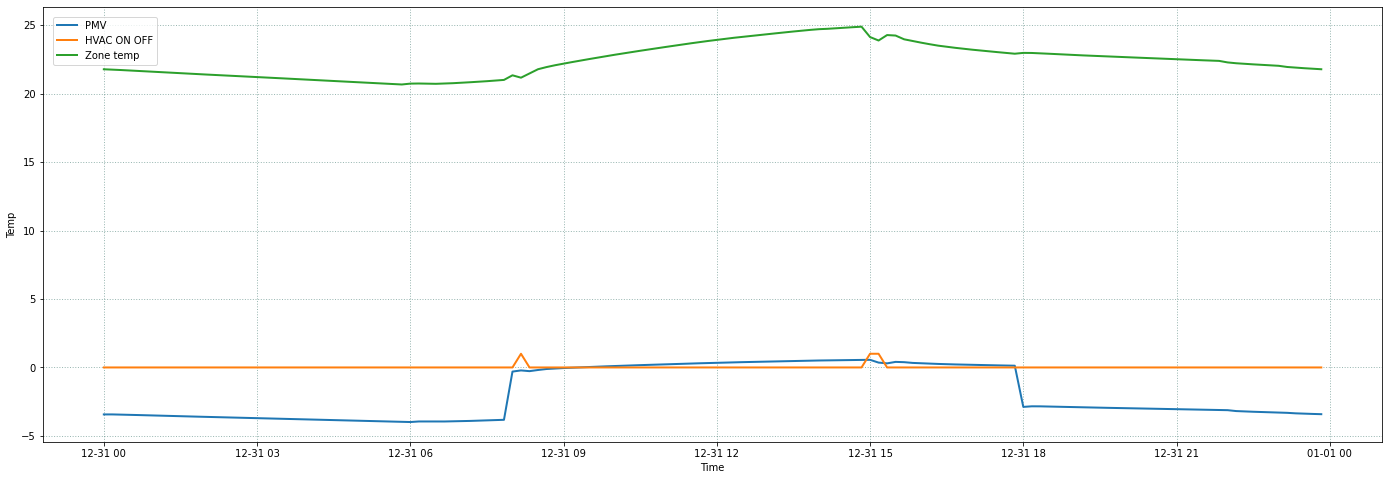

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(24,8))



plt.grid(True,color = '#004D40', linestyle='dotted', linewidth=1 , alpha=0.4)
plt.xlabel('Time')

plt.ylabel ('Temp')
plt.plot(df_PMV, lw=2 , label='PMV')
plt.plot(df_HVAC , lw =2 , label= 'HVAC ON OFF' )
plt.plot(df_Temp , lw =2 , label= 'Zone temp' )


#plt.plot(Actual_temp["Actual weather"] , lw =2 , label= 'temp measured' )
plt.legend(loc='upper left', borderaxespad=1)

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 24,
        }
#plt.text(Actual_Gas["Actual(m3)"].index[22], 10,'MBE='+str(round(MBE*100))+'%' +'\n' +'CV(RSME)='+str(round(CVRSME1*100))+'%')
#plt.plot()

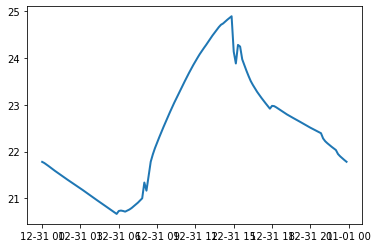

In [29]:
plt.plot(df_Temp , lw =2 , label= 'Zone temp' )

In [30]:
List= []
for ii in range (1,11):
    if ii < 10:
        T = "shade file " + "0" +str(ii)+",Schedule Value"
        List.append(T)
    else:
        T = "shade file " +str(ii)+",Schedule Value"
        List.append(T)
List

['shade file 01,Schedule Value',
 'shade file 02,Schedule Value',
 'shade file 03,Schedule Value',
 'shade file 04,Schedule Value',
 'shade file 05,Schedule Value',
 'shade file 06,Schedule Value',
 'shade file 07,Schedule Value',
 'shade file 08,Schedule Value',
 'shade file 09,Schedule Value',
 'shade file 10,Schedule Value']

In [31]:
column_names = List
df['OCR%']= df[column_names].sum(axis=1)


In [32]:
df["OCR%"]

2019-12-31 00:00:00    10.0
2019-12-31 00:10:00    10.0
2019-12-31 00:20:00    10.0
2019-12-31 00:30:00    10.0
2019-12-31 00:40:00    10.0
                       ... 
2019-12-31 23:10:00     0.0
2019-12-31 23:20:00     0.0
2019-12-31 23:30:00     0.0
2019-12-31 23:40:00     0.0
2019-12-31 23:50:00     0.0
Freq: 10T, Name: OCR%, Length: 144, dtype: float64

In [33]:
df.to_csv("C:/Users/Morteza/OneDrive/Python/OpyPlus/RollerShade/opyplus-external/df.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Morteza/OneDrive/Python/OpyPlus/RollerShade/opyplus-external/df.csv'

In [ ]:
OCR = df["OCR%"]

In [ ]:
plt.figure(figsize=(24,8))
plt.grid(True,color = '#004D40', linestyle='dotted', linewidth=1 , alpha=0.4)
plt.xlabel('Time')

plt.ylabel ('Temp')
plt.plot(OCR, lw=2 , label='OCR%')
#plt.plot(df_HVAC , lw =2 , label= 'Zone Temp' )
#plt.plot(Actual_temp["Actual weather"] , lw =2 , label= 'temp measured' )
plt.legend(loc='upper left', borderaxespad=1)